In [2]:
import pickle
import re
import string
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from spacy.lemmatizer import Lemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.parsing.preprocessing import remove_stopwords

In [4]:
df_nv = pickle.load(open("ten_sorted/nv_df_1m.p", 'rb'))

In [5]:
df_nv

,text,state,stars_x
user_id,,,
BnyG_hNHo9WBMJ6wXSHdRg,I've been rooting for this place since it open...,NV,2.0
pOhepbV22EhK5T7RTrE8IA,My Partner & I arrived First Time Customers th...,NV,5.0
VQwwJIAQ8CLAs_VNREjtIA,Stayed here during New Years. Stayed on the 32...,NV,2.0
Xik2T5t22y7PkCZm779R9w,Visited the pharmacy a few times in the last c...,NV,5.0
WnBmRYqBBIUmf1c6tia-XA,First of all this is one MASSIVE strip club. T...,NV,5.0
...,...,...,...
KOLXusA6neCNl3wIdWROgw,"Very great hotel overall, the staff knows how ...",NV,4.0
jUZW1alRK8QvdZ-pH1OquQ,$80 with yelp's $5 off. For iPhone 6 screen re...,NV,5.0
7HI1LxwR6gzBU5UlIctIeg,I toured over 15 different location and this w...,NV,5.0


In [6]:
def clean_text_round(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round = lambda x: clean_text_round1(x)

df_nv.text = df_nv.text.apply(lambda x: clean_text_round(x))
data_clean = df_nv
data_clean

,text,state,stars_x
user_id,,,
BnyG_hNHo9WBMJ6wXSHdRg,ive been rooting for this place since it opene...,NV,2.0
pOhepbV22EhK5T7RTrE8IA,my partner i arrived first time customers the...,NV,5.0
VQwwJIAQ8CLAs_VNREjtIA,stayed here during new years stayed on the fl...,NV,2.0
Xik2T5t22y7PkCZm779R9w,visited the pharmacy a few times in the last c...,NV,5.0
WnBmRYqBBIUmf1c6tia-XA,first of all this is one massive strip club th...,NV,5.0
...,...,...,...
KOLXusA6neCNl3wIdWROgw,very great hotel overall the staff knows how t...,NV,4.0
jUZW1alRK8QvdZ-pH1OquQ,with yelps off for iphone screen repair i w...,NV,5.0
7HI1LxwR6gzBU5UlIctIeg,i toured over different location and this was...,NV,5.0


In [7]:
pickle.dump(data_clean, open('data_clean/cleaned_nv.p', 'wb'))

In [8]:
nlp = English() 
nlp.max_length = 3000000
tokenizer = Tokenizer(nlp.vocab)

In [9]:
from textblob import TextBlob as tb

data_clean['polarity'] = data_clean['text'].apply(lambda x: tb(x).sentiment)

In [10]:
data_clean

,text,state,stars_x,polarity
user_id,,,,
BnyG_hNHo9WBMJ6wXSHdRg,ive been rooting for this place since it opene...,NV,2.0,"(0.059434203789042496, 0.46195596518177173)"
pOhepbV22EhK5T7RTrE8IA,my partner i arrived first time customers the...,NV,5.0,"(0.2729166666666667, 0.6354166666666666)"
VQwwJIAQ8CLAs_VNREjtIA,stayed here during new years stayed on the fl...,NV,2.0,"(0.20890692640692646, 0.635443722943723)"
Xik2T5t22y7PkCZm779R9w,visited the pharmacy a few times in the last c...,NV,5.0,"(0.17812499999999998, 0.4291666666666667)"
WnBmRYqBBIUmf1c6tia-XA,first of all this is one massive strip club th...,NV,5.0,"(0.20384615384615384, 0.45299145299145305)"
...,...,...,...,...
KOLXusA6neCNl3wIdWROgw,very great hotel overall the staff knows how t...,NV,4.0,"(0.1761111111111111, 0.5263888888888888)"
jUZW1alRK8QvdZ-pH1OquQ,with yelps off for iphone screen repair i w...,NV,5.0,"(0.2838095238095238, 0.5938095238095238)"
7HI1LxwR6gzBU5UlIctIeg,i toured over different location and this was...,NV,5.0,"(0.4318181818181818, 0.7035353535353536)"


In [20]:
nv_text = []

for i in data_clean.nlp:
    nv_text.append(i)

In [23]:
lemma_nv = []

for i in nv_text:
    for j in i:
        lemma_nv.append(j.lemma_)

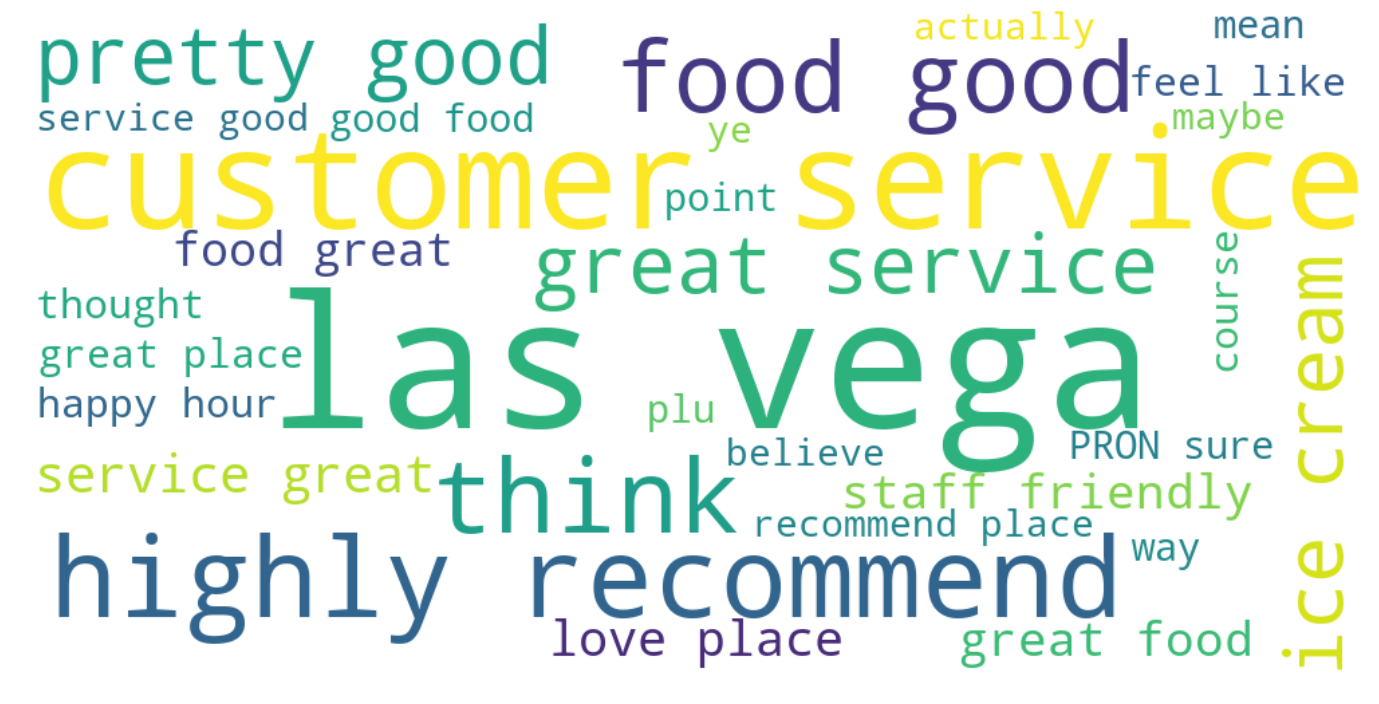

In [39]:
stopwords = STOP_WORDS

wordcloud = WordCloud(stopwords=stopwords, background_color='White', width=1000, height=500, max_words = 30).generate(' '.join(lemma_nv))

plt.figure(figsize=(24,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [27]:
pickle.dump(lemma_nv, open('lemmatized/nv_1m.p', 'wb'))

In [12]:
from nltk import word_tokenize

In [15]:
target = df_nv['stars_x']
data = df_nv['text'].map(word_tokenize).values